In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv('./dataset/spam.csv', encoding='latin-1').drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


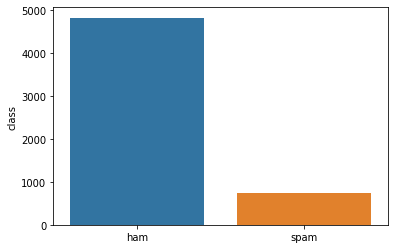

In [54]:
sns.barplot(x=df['class'].value_counts().index, y=df['class'].value_counts())

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC, LinearSVR, SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

In [56]:
X = df.message
y = df['class']

In [57]:
X_vector = CountVectorizer().fit_transform(X)
X_vector.shape

(5572, 8672)

In [58]:
y_encode = LabelEncoder().fit_transform(y)
y_encode.shape

(5572,)

In [79]:
df['class'][:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

In [80]:
y_encode[:5]

array([0, 0, 1, 0, 0])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_encode, test_size=.2, stratify=y_encode, random_state=42)

In [70]:
X_train

<4457x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 58998 stored elements in Compressed Sparse Row format>

In [72]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9811659192825112

In [199]:
y_p_test = clf.predict(X_test)
f1_score(y_test, y_p_test)

0.9306930693069307

In [78]:
svc = LinearSVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9820627802690582

In [74]:
svr = LinearSVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.7888281298647344

In [75]:
from sklearn.model_selection import GridSearchCV

In [130]:
from sklearn.metrics import f1_score, make_scorer

In [156]:
grid_svc = LinearSVC()

params = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'square_hinge'],
    'tol': [1e-4, 1e-5, 1e-3],
    'C': [0.1, 0.5, 1.5, 2, 2.5, 3],
    'class_weight': [{0:0.15, 1:0.85}, {0:0.2, 1:0.8}]
}

gs = GridSearchCV(grid_svc, params, cv=10, verbose=2, n_jobs=-1, scoring='f1')
gs

GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.5, 2, 2.5, 3],
                         'class_weight': [{0: 0.15, 1: 0.85}, {0: 0.2, 1: 0.8}],
                         'loss': ['hinge', 'square_hinge'],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 1e-05, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [157]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1361 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:    8.1s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.5, 2, 2.5, 3],
                         'class_weight': [{0: 0.15, 1: 0.85}, {0: 0.2, 1: 0.8}],
                         'loss': ['hinge', 'square_hinge'],
                         'penalty': ['l1', 'l2'],
                         'tol': [0.0001, 1e-05, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [158]:
gs.score(X_test, y_test)

0.9285714285714286

In [159]:
gs.best_params_

{'C': 1.5,
 'class_weight': {0: 0.15, 1: 0.85},
 'loss': 'hinge',
 'penalty': 'l2',
 'tol': 0.0001}

In [160]:
best_svm =LinearSVC(
 C= 1,
 class_weight= {0: 0.2, 1: 0.8},
 loss= 'hinge',
 penalty= 'l2',
 tol= 0.0001
)

In [161]:
best_svm.fit(X_train, y_train)
best_svm.score(X_train, y_train)

0.9997756338344178

In [162]:
best_svm.score(X_test, y_test)

0.9820627802690582

In [163]:
y_train_pred = best_svm.predict(X_train)
y_test_pred = best_svm.predict(X_test)

In [164]:
print('f1_score train set : {}'.format(f1_score(y_train, y_train_pred)))
print('f1_score test set : {}'.format(f1_score(y_test, y_test_pred)))

f1_score train set : 0.9991631799163181
f1_score test set : 0.9285714285714286


In [165]:
from sklearn.metrics import confusion_matrix

In [166]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

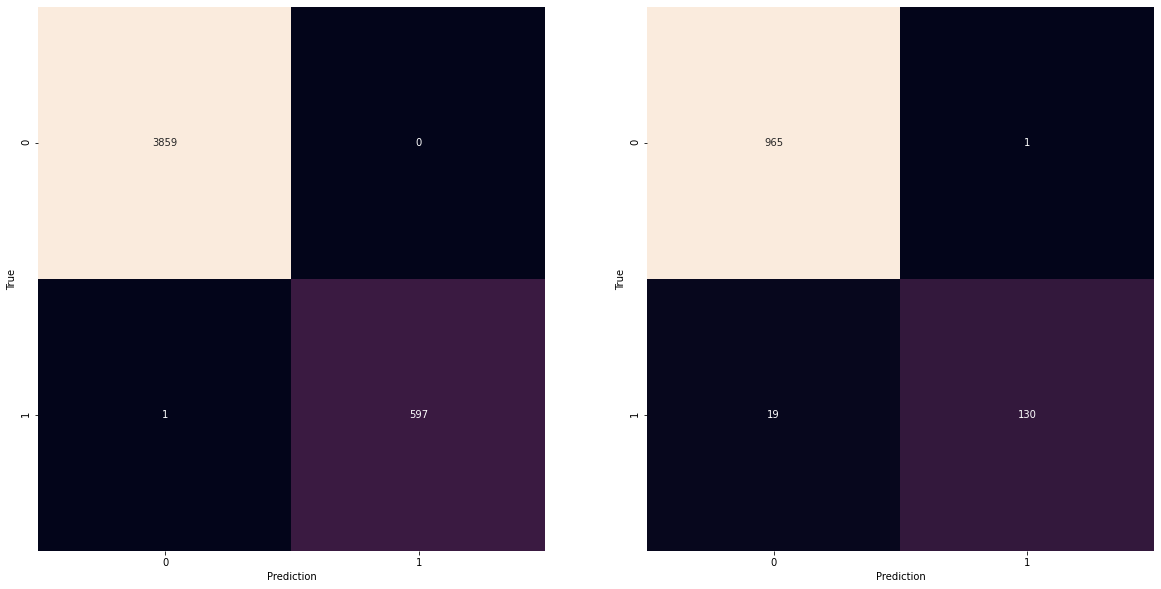

In [167]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(cm_train, annot=True, cbar=False, fmt='d', ax=ax1)
ax1.set_ylabel('True')
ax1.set_xlabel('Prediction')

sns.heatmap(cm_test, annot=True, cbar=False, fmt='d', ax=ax2)
ax2.set_ylabel('True')
ax2.set_xlabel('Prediction')

plt.show()

In [173]:
grid_SVC = SVC()

params_svc = {
    'kernel': ['rbf', 'liner', 'poly', 'sigmoid'],
    'degree': [1, 3, 5],
    'gamma': ['scale', 'auto'],
    'C': [0.1, 0.5, 1.5, 2, 2.5],
    'class_weight': [{0:0.2, 1:0.8}],
    'coef0': [0.1, 0.01]
}

grid = GridSearchCV(grid_SVC, params_svc, cv=10, verbose=2, n_jobs=-1, scoring='f1')
grid

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.5, 2, 2.5],
                         'class_weight': [{0: 0.2, 1: 0.8}],
                         'coef0': [0.1, 0.01], 'degree': [1, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'liner', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [174]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 19.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1.5, 2, 2.5],
                         'class_weight': [{0: 0.2, 1: 0.8}],
                         'coef0': [0.1, 0.01], 'degree': [1, 3, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'liner', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=2)

In [175]:
grid.best_params_

{'C': 2.5,
 'class_weight': {0: 0.2, 1: 0.8},
 'coef0': 0.1,
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'poly'}

{'C': 2.5,
 'class_weight': {0: 0.2, 1: 0.8},
 'coef0': 0.1,
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'poly'}

In [177]:
grid.score(X_test, y_test)

0.9361702127659575

In [178]:
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

In [179]:
print('f1_score train set : {}'.format(f1_score(y_train, y_train_pred)))
print('f1_score test set : {}'.format(f1_score(y_test, y_test_pred)))

f1_score train set : 0.9865996649916249
f1_score test set : 0.9361702127659575


In [180]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

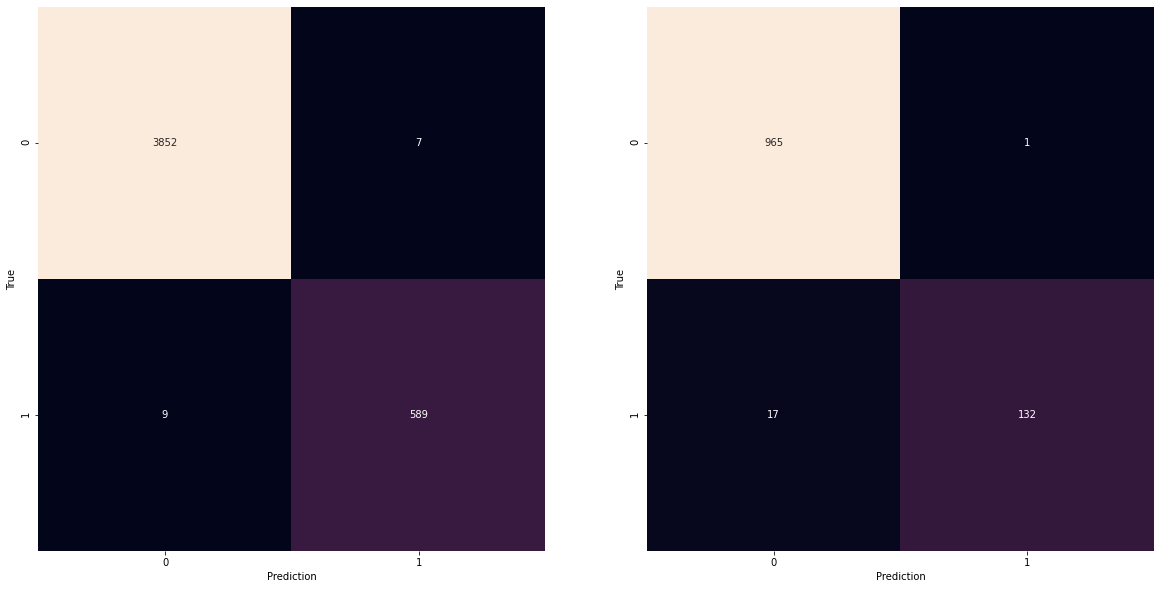

In [181]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.heatmap(cm_train, annot=True, cbar=False, fmt='d', ax=ax1)
ax1.set_ylabel('True')
ax1.set_xlabel('Prediction')

sns.heatmap(cm_test, annot=True, cbar=False, fmt='d', ax=ax2)
ax2.set_ylabel('True')
ax2.set_xlabel('Prediction')

plt.show()

In [182]:
from sklearn.feature_extraction.text import TfidfTransformer
X_tidf = TfidfTransformer().fit_transform(X_vector)
X_tidf.shape

(5572, 8672)

In [183]:
X_vector.shape

(5572, 8672)

In [184]:
X_train_idf, X_test_idf, y_train_idf, y_test_idf = train_test_split(X_tidf, y_encode, random_state=42, stratify=y_encode, test_size=0.2)

In [185]:
best_svm.fit(X_train_idf, y_train_idf)
best_svm.score(X_test_idf, y_test_idf)

0.9811659192825112

In [187]:
y_test_pred_idf = best_svm.predict(X_test_idf)
f1_score(y_test_idf, y_test_pred_idf)

0.9257950530035336

In [190]:
mdl = SVC(C= 2.5, class_weight= {0: 0.2, 1: 0.8}, coef0= 0.1, degree= 1, gamma= 'scale', kernel= 'poly')

mdl.fit(X_train_idf, y_train_idf)
mdl.score(X_test_idf, y_test_idf)

0.9847533632286996

In [191]:
y_test_pred_idf = mdl.predict(X_test_idf)
f1_score(y_test_idf, y_test_pred_idf)

0.9403508771929825

In [192]:
cm_test = confusion_matrix(y_test_idf, y_test_pred_idf)

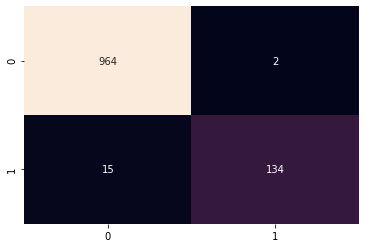

In [193]:
sns.heatmap(cm_test, annot=True, cbar=False, fmt='d')

In [195]:
y_train_pred_idf = mdl.predict(X_train_idf)
f1_score(y_train_idf, y_train_pred_idf)

0.9908409658617818

In [196]:
cm_train = confusion_matrix(y_train_idf, y_train_pred_idf)

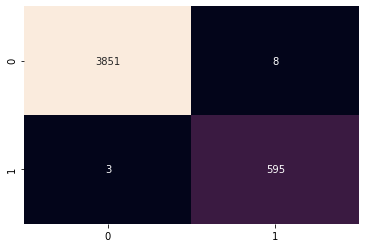

In [197]:
sns.heatmap(cm_train, annot=True, fmt='d', cbar=False)

In [200]:
confusion_matrix(y_test, y_p_test)

array([[953,  13],
       [  8, 141]])

In [205]:
clf.fit(X_train_idf, y_train_idf)
y_pred_clf_test_idf = clf.predict(X_test_idf)
confusion_matrix(y_test_idf, y_pred_clf_test_idf)

array([[966,   0],
       [ 43, 106]])

In [203]:
from spacy.lang.en.stop_words import STOP_WORDS

In [223]:
X_idf_stop = CountVectorizer(stop_words=STOP_WORDS).fit_transform(df.message)


In [224]:
X_train_idf_stop, X_test_idf_stop, y_train_idf_stop, y_test_idf_stop = train_test_split(X_idf_stop, y_encode, random_state=42, stratify=y_encode, test_size=0.2)

In [225]:
mdl.fit(X_train_idf_stop, y_train_idf_stop)

SVC(C=2.5, break_ties=False, cache_size=200, class_weight={0: 0.2, 1: 0.8},
    coef0=0.1, decision_function_shape='ovr', degree=1, gamma='scale',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [226]:
yyyy = mdl.predict(X_test_idf_stop)
confusion_matrix(y_test_idf_stop, yyyy)

array([[966,   0],
       [ 17, 132]])

In [227]:
df['label'] = df['class'].map({'ham':0, 'spam':1})

In [228]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('vect', CountVectorizer(stop_words=STOP_WORDS)),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB())
])

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
               'clf__alpha': (1e-2, 1e-3, 1e-4),
}

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(df.message, df.label)

In [229]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}

In [ ]:
gs_clf.predict